# 1.Creating a Model for Findin if a email is SPAM or HAM

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score


In [6]:
!pip install scikit-learn

##### Reading the csv file

In [8]:
df = pd.read_csv(r"C:\Users\navan\Desktop\NK\VS\py\Data Sets\spam or ham\spam.csv")
df.drop_duplicates(inplace = True)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


##### dropping the columns which are not used

In [9]:
df = df.drop('Unnamed: 2', axis=1)
df = df.drop('Unnamed: 3', axis=1)
df = df.drop('Unnamed: 4', axis=1)
df.columns

Index(['v1', 'v2'], dtype='object')

##### Having a look at the data in the csv

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.sample(5)

,v1,v2
2405,ham,Its posible dnt live in &lt;#&gt; century cm ...
5101,ham,Where you. What happen
1598,ham,Get ready to put on your excellent sub face :)
2950,ham,Babe? You said 2 hours and it's been almost 4 ...
4555,ham,I anything lor.


In [12]:
df.tail()

,v1,v2
6292,spam,You've Won a Prize! Claim Your Reward Now!
6293,spam,Congratulations! You're the Lucky Prize Winner!
6294,spam,Subject: Prize Announcement: You've Won Big!
6295,spam,You're Our Grand Prize Winner! Claim Your Rewa...
6296,spam,Subject: Prize Notification: Your Gifts Are Re...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5704 entries, 0 to 6296
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5704 non-null   object
 1   v2      5704 non-null   object
dtypes: object(2)
memory usage: 133.7+ KB


In [14]:
df.describe()

,v1,v2
count,5704,5704
unique,2,5704
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4570,1


#### Graphing of the distribution of the available Spam vs Ham mails

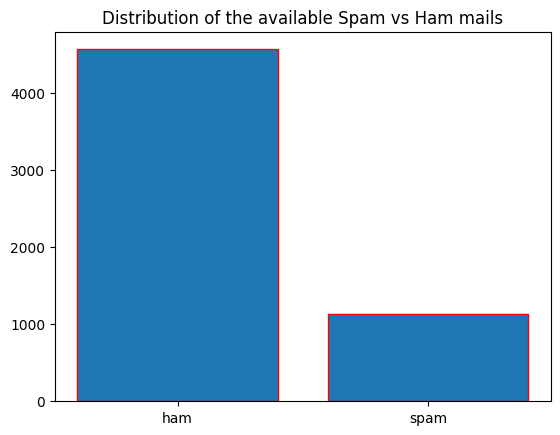

In [15]:
a = df['v1'].value_counts()

plt.bar(a.index,a.values,edgecolor = 'r')
plt.title("Distribution of the available Spam vs Ham mails")
plt.show()

In [16]:
#percentage of spams and hams

print(f"{a.index[0]}  mails are : {(a.values[0]*100)/(a.values[0]+a.values[1])} %")
print(f"{a.index[1]} mails are : {(a.values[1]*100)/(a.values[0]+a.values[1])} %")

ham  mails are : 80.11921458625525 %
spam mails are : 19.88078541374474 %


##### Changing the 'spam' and 'ham' into 1's and 0's

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['v1'] = le.fit_transform(df['v1'])
df.head()
#HAM  --> 0
#SPAM --> 1

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### There is a very large imbalance in the data set

In [18]:
!pip install nltk

In [20]:
import nltk
# nltk.download('punkt')

In [21]:
# nltk.download('stopwords')

##### For number of characters

In [22]:
#number of charecters in each rows
df['num_characters'] = df['v2'].apply(len)

In [23]:
df.head()

,v1,v2,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


##### For number of words

In [24]:
#breaking the words seperate
df['num_words'] = df['v2'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,v1,v2,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


##### For number of sentences

In [25]:
df['num_sentences'] = df['v2'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,v1,v2,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df.describe()

,v1,num_characters,num_words,num_sentences
count,5704.000000,5704.000000,5704.000000,5704.000000
mean,0.198808,77.971599,18.061536,1.938289
std,0.399138,56.252657,12.854992,1.392868
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,37.000000,9.000000,1.000000
50%,0.000000,62.000000,14.000000,2.000000
75%,0.000000,109.000000,25.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [27]:
df[df['v1'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4570.000000,4570.000000,4570.000000
mean,70.506346,17.104595,1.819912
std,56.035743,13.416343,1.376155
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,89.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['v1'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1134.000000,1134.000000,1134.000000
mean,108.056437,21.917989,2.415344
std,46.202731,9.345925,1.357979
min,4.000000,1.000000,1.000000
25%,67.000000,14.000000,1.000000
50%,111.500000,21.000000,2.000000
75%,152.750000,30.000000,3.000000
max,271.000000,53.000000,9.000000


##### Histogram

In [29]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

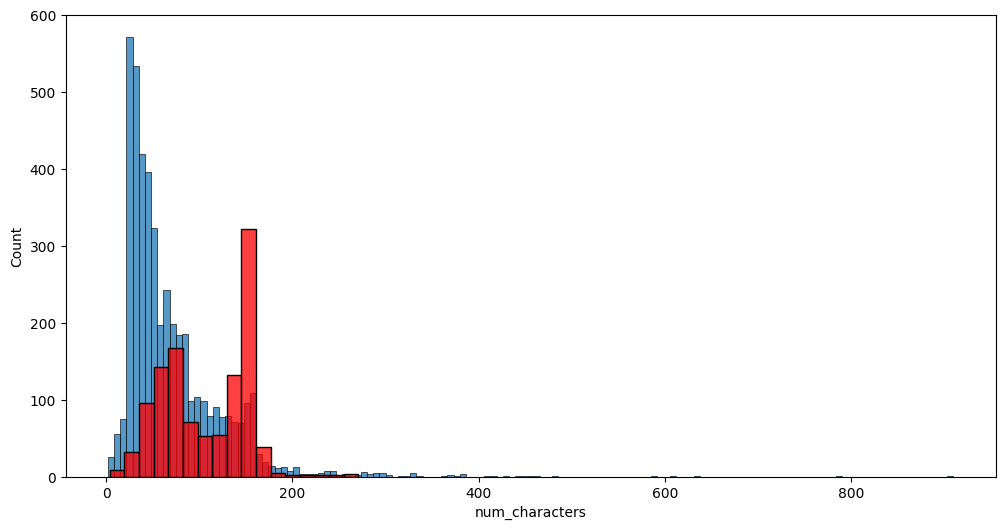

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['v1']==0]['num_characters'])
sns.histplot(df[df['v1']==1]['num_characters'],color = 'r')

<Axes: xlabel='num_words', ylabel='Count'>

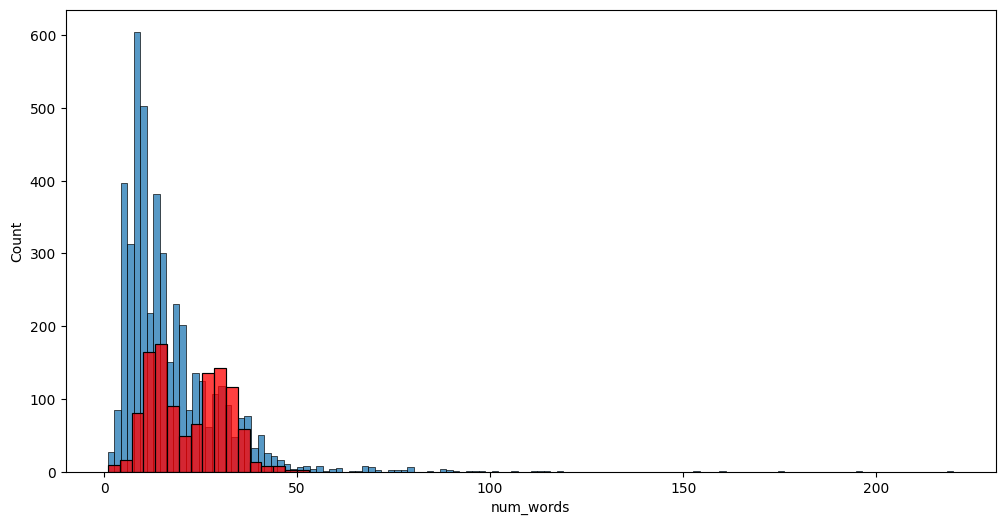

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['v1']==0]['num_words'])
sns.histplot(df[df['v1']==1]['num_words'],color = 'r')

C:\Users\navan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


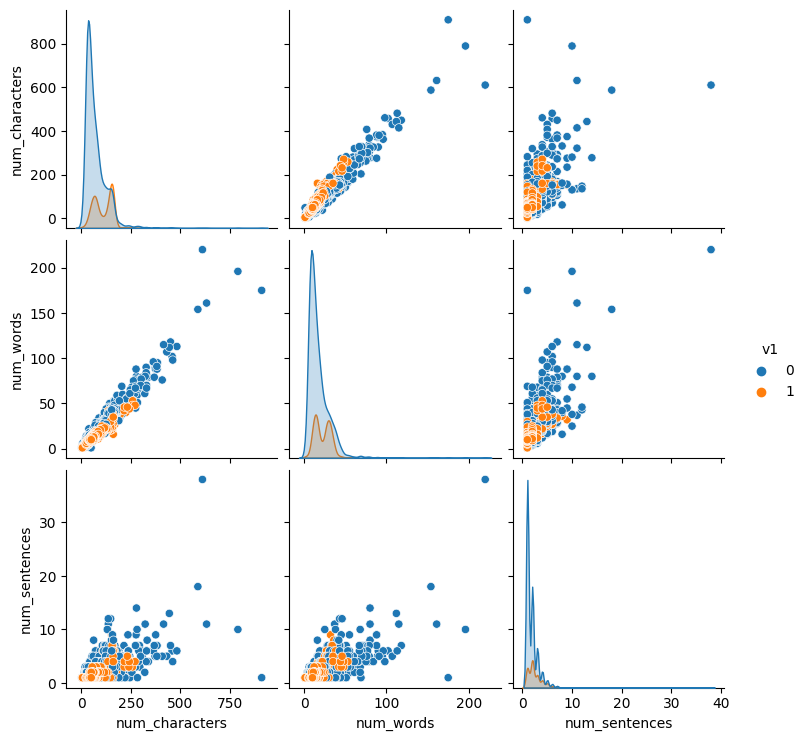

In [32]:
sns.pairplot(df,hue='v1')

C:\Users\navan\AppData\Local\Temp\ipykernel_24048\1558964620.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

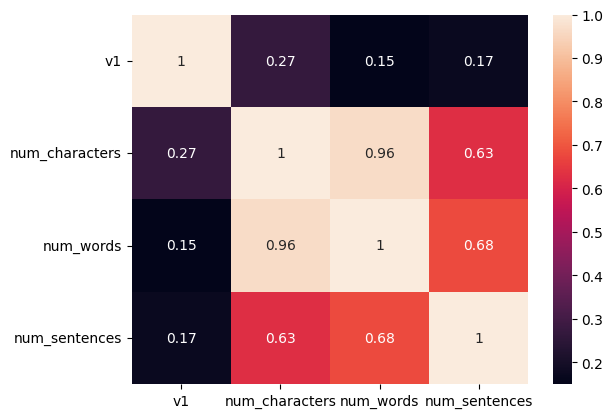

In [33]:
#correlation coeff
sns.heatmap(df.corr(),annot=True)

### Text Preprocessing

In [34]:
#Lower case
#Tokenization
#removing special characters
#Removing stop words and punctuations
#Steming --> dance, dancing, danced will be converted to one word

In [41]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [40]:
transform_text("SKDJFKJD how are you!!?? 20%% i LoveD the youtube loving")

'skdjfkjd 20 love youtub love'

In [37]:
from nltk.corpus import stopwords
stopwords.words('english')[1:10]

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [38]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
#steming

from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem('loving')

'love'

In [42]:
df['transformed_text'] = df['v2'].apply(transform_text)

In [43]:
df.head()

,v1,v2,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### Word Cloud

In [31]:
!pip install wordcloud

In [44]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size =10,background_color='white')

In [45]:
spam_wc = wc.generate(df[df['v1']==1]['transformed_text'].str.cat(sep=" "))

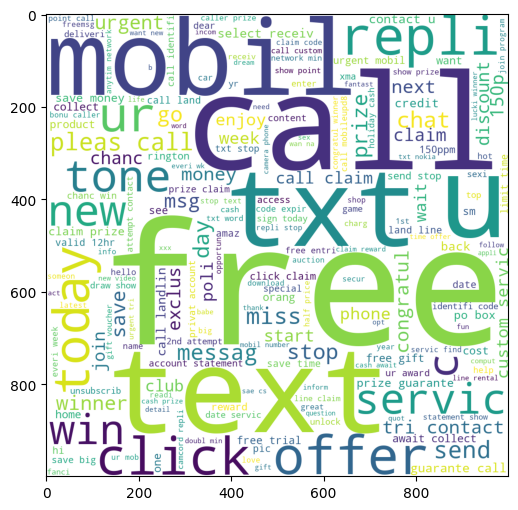

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(df[df['v1']==0]['transformed_text'].str.cat(sep=" "))

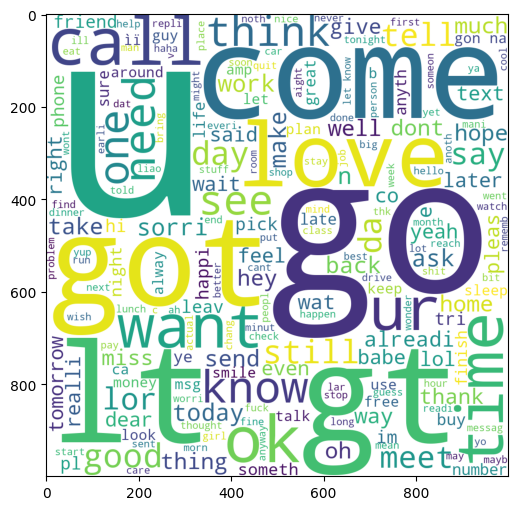

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

##### Top Words in Spam and Ham 

In [49]:
spam_corpus = []
for msg in df[df['v1']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
print(len(spam_corpus))

13182


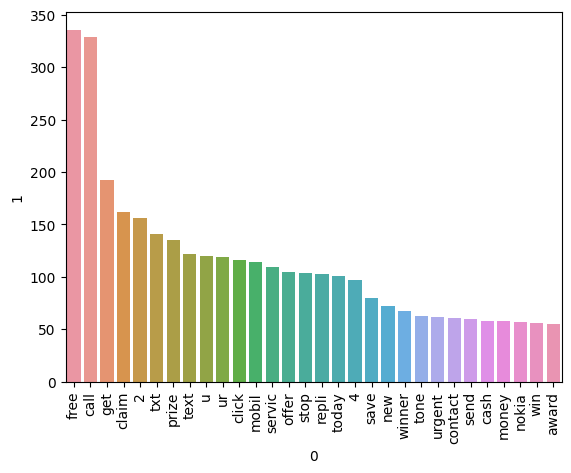

In [51]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
ham_corpus = []
for msg in df[df['v1']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
print(len(ham_corpus))

35773


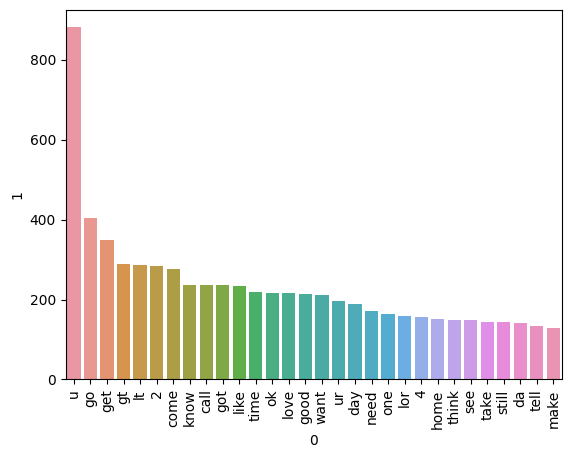

In [54]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(df['transformed_text']).toarray()
X.shape

(5704, 6860)

In [56]:
Y = df['v1'].values
Y

array([0, 0, 1, ..., 1, 1, 1])

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=2)

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8624014022787029
[[763 138]
 [ 19 221]]
0.6155988857938719


In [61]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.971954425942156
[[885  16]
 [ 16 224]]
0.9333333333333333


In [62]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9596844872918493
[[894   7]
 [ 39 201]]
0.9663461538461539


#### MODEL USIGN TFIDF

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

tfidf = TfidfVectorizer(max_features=3500)

x = tfidf.fit_transform(df['transformed_text']).toarray()
x.shape

NameError: name 'df' is not defined

In [64]:
#did not work in precision
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

In [65]:
# x = np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [66]:
y = df['v1'].values
y

array([0, 0, 1, ..., 1, 1, 1])

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=2)

In [68]:
gnb1 = GaussianNB()
mnb1 = MultinomialNB()
bnb1 = BernoulliNB()

In [69]:
gnb1.fit(x_train,y_train)
pred1 = gnb1.predict(x_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(precision_score(y_test,pred1))

0.8641542506573181
[[772 129]
 [ 26 214]]
0.6239067055393586


In [70]:
mnb1.fit(x_train,y_train)
pred2 = mnb1.predict(x_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(precision_score(y_test,pred2))

0.9702015775635408
[[900   1]
 [ 33 207]]
0.9951923076923077


In [71]:
bnb1.fit(x_train,y_train)
pred3 = bnb1.predict(x_test)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(precision_score(y_test,pred3))

0.9728308501314636
[[897   4]
 [ 27 213]]
0.9815668202764977


In [164]:
# Has mnb1 has better precission we will chose MultinomialNB with TfidFVectorizer

In [165]:
#model improving 
#1. the max_feature parameter of tfidf
#2. Scaling having values b/w 0-1
#3. we have more row by adding the rows
#4. Votting classifier
#5. Stacking

## Pickling

In [72]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb1,open('modelmnb.pkl','wb'))